# Polinomios de Legendre
**Autor:** Martínez Torres Marcos Alfonso, Facultad de Ingeniería, UNAM

Licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Adrien-Marie Legendre

(París, 1752 - Auteuil, Francia, 1833) Matemático francés. Tras completar sus estudios en el Collège Mazarin, obtuvo una cátedra de matemáticas en la Escuela Militar de París, en la que ejerció la docencia (1775-1780) y para la que completó un estudio sobre la trayectoria de los proyectiles que le supuso el Premio de la Academia de Berlín en 1782.<br>

En 1785 introdujo a los polinomios de Legendre.Tuvo numerosas desputas prioritarias con Gauss, principalmente debido a la falla de Gauss al publicar muchos de sus resultados originales mucho después de que los había descubierto.<br>

Al año siguiente ingresó en la Academia de Ciencias con una memoria sobre la atracción de los esferoides. Formó parte de la comisión que llevó a cabo la conexión geodésica entre los observatorios de Greenwich y París (1787) y participó en las tareas de establecimiento del metro patrón (1791). A partir de 1795 enseñó matemáticas en la École Normale, y en 1812 sucedió a Joseph-Louis de Lagrange en la dirección de la Agencia de Longitudes.<br>

En sus primeros trabajos, centrados en la mecánica, Adrien-Marie Legendre introdujo conceptos como la función que lleva su nombre o la primera demostración (anterior a la de Carl Friedrich Gauss) del método de los mínimos cuadrados. Muy notable es su Tratado de las funciones elípticas y de las integrales eulerianas (1817-1832), en el que, tras los pasos de Leonhard Euler y Joseph-Louis de Lagrange, estudió de forma sistemática las funciones elípticas y las redujo a tres formas básicas.<br>

Adrien-Marie Legendre fue el primero en dedicar una obra estrictamente a la teoría de números (Théorie des nombres, aparecida en 1830), ámbito en el que obtuvo resultados fundamentales como la demostración de la ley de la reciprocidad cuadrática. En 1794 había publicado los Elementos de geometría, una versión reordenada y simplificada de la obra original de Euclides que conocería multitud de reediciones y que fue traducida a más de treinta idiomas.

## Teoría

Los polinomios de Legendre son un conjunto de funciones que satisfacen las condiciones de ortogonalidad en el intervalo $t\:\epsilon\:(-1,\;1)$, que se establecen de la ecuación diferencial de Legendre, 
$$
(1-t^2) \frac{d^2}{dt^2} P_n(t) - 2t \frac{d}{dt} P_n(t) + n(n+1) P_n(t) = 0
$$
donde:
$$
\begin{align}
P_0 =& 1 \notag\\
P_1 =& t \notag\\
P_2 =& \frac{3}{2}t^2 - \frac{1}{2} \notag\\
P_3 =& \frac{5}{2}t^3 - \frac{3}{2}t \notag\\
P_4 =& \frac{35}{8}t^4 - \frac{15}{4}t^2 + \frac{3}{8} \notag \\
&\vdots \notag \\
\end{align}
$$

en los que el n-ésimo termino está dado por la fórmula de Rodrigues:
$$
P_n(t) = \frac{1}{2^{n}n!}\frac{d^n}{dt^n}(t^2-1)^n
$$
Estos polinomios forman un conjunto ortogonal en el intervalo de $t\:\epsilon\:(-1,\;1)$, cumpliendo con lo siguiente:
$$
\int_{-1}^{1} {P_n(t)P_m(t)}dt = 
\begin{cases} 
0, & \text{; } m \neq n \\ 
\frac{2}{n+1}, & \text{; } m = n 
\end{cases}

## Código

Se importan las bibliotecas de Python
* *numpy* : Permite crear y gestionar arreglos multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel que operan sobre estos arreglos. El sitio oficial es https://numpy.org/
* *matplotlib* : Permite crear visualizaciones estáticas, animadas e interactivas en 2D y 3D. El sitio oficial es https://matplotlib.org/
* *scipy* : Es una colección de herramientas y algoritmos matemáticos para Python. Esta librería proporciona funciones para realizar integración numérica, es decir, calcular el valor numérico de una integral definida. La función quad se utiliza específicamente para calcular la integral numérica de una función en un intervalo definido. El sitio oficial es https://scipy.org/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import factorial

### Creación de los Polinomios

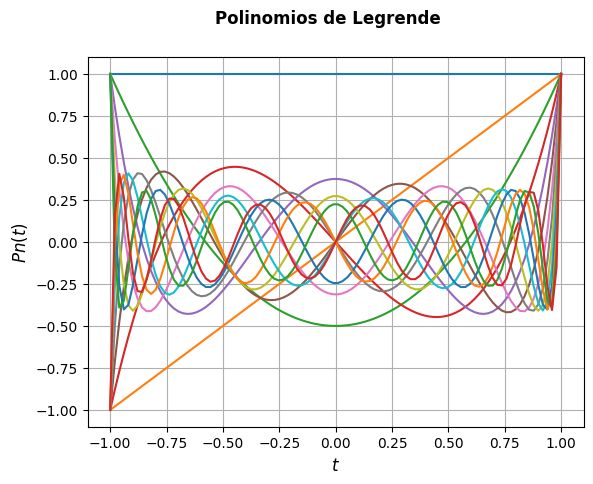

In [8]:
#Empezamos definiendo una funcion que calcule el polinomio de Legendre con la formúla de Rodríguez
def polinomio_legendre (n,t):
    coeficiente = 1/(2**n * factorial(n)) #Coeficiente de la formula
    # Calcular la derivada n-ésima de (t^2 - 1)^n
    # np.poly1d crea un polinomio a partir de sus coeficientes
    base = np.poly1d([1, 0, -1])**n  # Esto representa (t^2 - 1)^n
    derivada = np.polyder(base, n)  # Derivada n-ésima de la base
    Pn = coeficiente * derivada(t)
    return Pn #Retornamos el valor del polinomio

t = np.linspace(-1,1,100) #Vector t para evaluar al polinomio
# Definir un rango de grados de polinomios de Legendre que deseas graficar
grados = range(int(input("Cantidad de polinomios a crear: ")))  # Esto grafica polinomios de grado 0 a grados - 1

#Graficar el polinomio
# Se crea la figura
fig = plt.figure()

# Calcular y graficar cada polinomio
for n in grados:
    Pn_t = polinomio_legendre(n, t)
    plt.plot(t, Pn_t, label=f'$P_{n}(t)$')

# Se edita la figura
plt.xlabel('$t$',fontsize=12) # Se escribe la etiqueta del eje de la variable indpendiente en tamaño de letra 12
plt.ylabel('$Pn(t)$',fontsize=12) # Se escribe la etiqueta del eje de la función en tamaño de letra 12
plt.suptitle('Polinomios de Legrende', weight='bold') # Se escribe el título de la gráfica 
plt.grid() # Se grafica la cuadrícula

# Se muestra la figura
plt.show()


### Producto interior

In [10]:
# Función constante P_0(t) = 1
def P0(t):
    return np.ones_like(t)

# Función para integrar P_0(t) * P_n(t) en el intervalo [-1, 1]
def integrando(t, x):
    return P0(t) * polinomio_legendre(x, t)

# Pedir al usuario el valor del grado del polinomio
x = int(input("Ingrese el grado del Polinomio de Legendre: "))

# Calcular la integral de P_0(t) * P_n(t) en el intervalo [-1, 1]
resultado, _ = quad(integrando, -1, 1, args=(x,))

print(f"Resultado de la integral de P_0(t) * P_{x}(t) en el intervalo [-1, 1]: {resultado}")



Resultado de la integral de P_0(t) * P_3(t) en el intervalo [-1, 1]: 0.0
